* 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_Game = pd.read_csv("/content/drive/MyDrive/PUBG/PUBGOPGG.csv")
data_Game.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [5]:
data_Game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861243 entries, 0 to 861242
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               861243 non-null  object 
 1   groupId          861243 non-null  object 
 2   matchId          861243 non-null  object 
 3   assists          861243 non-null  int64  
 4   boosts           861243 non-null  int64  
 5   damageDealt      861243 non-null  float64
 6   DBNOs            861243 non-null  int64  
 7   headshotKills    861243 non-null  int64  
 8   heals            861243 non-null  int64  
 9   killPlace        861243 non-null  int64  
 10  killPoints       861243 non-null  int64  
 11  kills            861243 non-null  int64  
 12  killStreaks      861243 non-null  int64  
 13  longestKill      861243 non-null  float64
 14  matchDuration    861243 non-null  int64  
 15  matchType        861243 non-null  object 
 16  maxPlace         861242 non-null  floa

* 가설 = 킬이 많으면 -> 1등할 가능성이 높다?

# 칼럼설명
|변수|데이터 유형|데이터 설명|
|---|:---|:---|
|assists|숫자|자신에게 사살되지 못했지만 데미지를 넣은 적의 수|
|boosts|숫자|도핑 아이템 사용 횟수|
|daamageDealt|숫자|적에게 가한 전체 대미지|
|DBNOs|숫자|기절시킨 적의 수|
|groupId|문자열|경기내 식별 ID|
|headshotKills|숫자|헤드샷으로 죽인 적의 수|
|heals|숫자|회복 아이템 사용 횟수|
|Id|문자열|해당 데이터 ID|
|killPlace|숫자|경기 내 죽인 적 의 순위|
|killPoints|숫자|유저의 레이팅|
|kills|숫자|경기 내 적을 죽인 수|
|killStraks|숫자|짧은 시간 내에 연속으로 적을 죽인 수|
|longstKill|숫자|사살한 적까지의 거리 최대값|
|matchDuration|숫자|경기가 진행된 시간 (단위: 초)|
|matchId|문자열|경기 식별 ID|
|matchType|문자열|경기 모드(솔로, 듀오, 스쿼드...)|
|matchPlace|숫자|경기 내 최대 그룹(솔로*1, 듀오*2, 스쿼드*4 해야 총원)|
|numGroups|숫자|경기 내 참여 인원 수|
|rankPoints|숫자|유저의 레이팅|
|revives|숫자|유저가 팀원을 부활시킨 횟수|
|rideDistance|숫자|이동수단을 통해 이동한 거리(단위: m)|
|roadKills|숫자|이공수단으로 살해한 적의 수|
|swimDistance|숫자|수영으로 이동한 거리(단위: m)|
|teamKills|숫자|같은 팀원을 살해한 수|
|vehicleDestroys|숫자|파괴한 이동수단의 수|
|walkDistance|숫자|걸어서 이동한 거리(단위: m)|
|weaponsAcquired|숫자|흭득한 무기의 수|
|winPoints|숫자|유저의 ELO레이팅(승리 횟수 기반)|
|winPlacePerc|숫자|현재 경기에서의 백분위 기반 유저의 순위(종속변수)|

In [6]:
#na값 확인
data_Game.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           1
numGroups          1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

In [7]:
#na 제거
data_Game.dropna()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861237,6d18243385a60d,561c64723467d6,eeb77aadae70ce,0,0,100.00,1,0,1,52,...,0.0,0.0000,0.0,0.00,0.0,0.0,667.70,4.0,1462.0,0.4828
861238,fb72b8918be876,4cbabdc74ed9a2,0e2bc317264301,0,0,207.00,2,1,0,12,...,0.0,280.5000,0.0,0.00,0.0,0.0,1467.00,3.0,0.0,0.7037
861239,e72959729aed4c,c4b2ae89df782c,3cdc7dcd7c1c47,0,0,78.94,0,0,0,34,...,0.0,0.0000,0.0,0.00,0.0,0.0,523.70,5.0,1444.0,0.3535
861240,83ca1598f0ed53,d3b1cb16b89ad1,54093dd88d6b65,0,1,113.20,0,0,1,54,...,0.0,0.0000,0.0,0.00,0.0,0.0,1124.00,3.0,1501.0,0.6170


* 필요없는 칼럼 제거
- Id, groupId, matchId, numGroup, matchDurtion

In [8]:
data2_Game = data_Game.copy()

In [9]:
data2_Game.drop(['Id', 'groupId', 'matchId', 'numGroups', 'matchDuration'], axis = 1, inplace = True)

In [10]:
data2_Game.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


* 이상치 제거를 위해 산점도를 그려본다. x = 이동거리 y = 무기획득

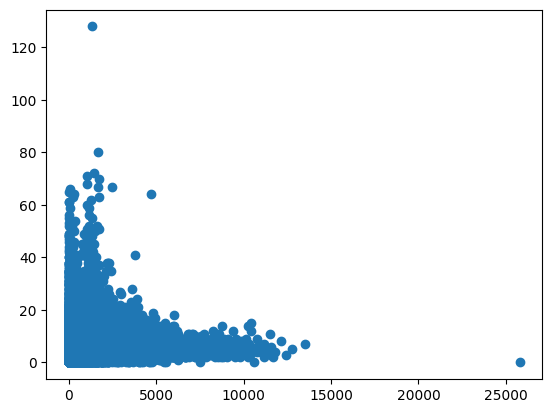

In [11]:
plt.scatter(x = 'walkDistance', y = 'weaponsAcquired', data = data2_Game)
plt.show()

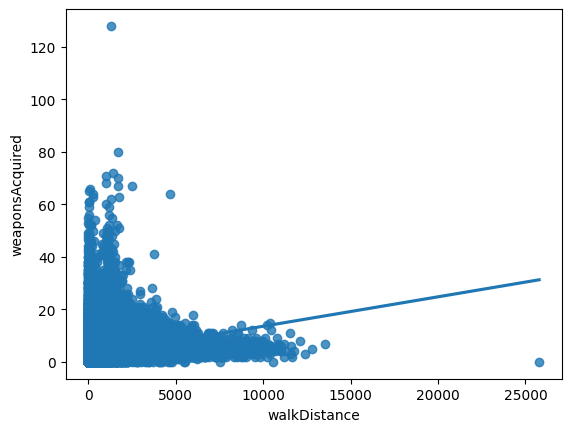

In [12]:
sns.regplot(x = 'walkDistance', y = 'weaponsAcquired', data = data2_Game)
plt.show()

In [13]:
data2_Game['walkDistance'].describe()

count    861242.000000
mean       1154.836758
std        1183.609298
min           0.000000
25%         155.700000
50%         685.900000
75%        1977.000000
max       25780.000000
Name: walkDistance, dtype: float64

In [14]:
#이상치 제거 함수
def dlt_data(var):
    q1 = data2_Game[var].quantile(0.25)
    q3 = data2_Game[var].quantile(0.75)
    iqr = q3-q1
    data_hi =q3+1.5*iqr
    data_row = q1-1.5*iqr
    dlt_c = data2_Game[var][(data2_Game[var] < data_row)|(data2_Game[var] > data_hi)].index
    data2_Game.drop(dlt_c, inplace = True)

In [15]:
dlt_walk = data2_Game.loc[(data_Game['walkDistance'] == 0)&(data2_Game['weaponsAcquired'] > 0)].index
data2_Game.drop(dlt_walk, inplace = True)

In [16]:
dlt_data('walkDistance')
dlt_data('weaponsAcquired')

In [17]:
data2_Game

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861238,0,0,207.00,2,1,0,12,0,2,1,...,0.0,280.5000,0.0,0.00,0.0,0.0,1467.00,3.0,0.0,0.7037
861239,0,0,78.94,0,0,0,34,1204,1,1,...,0.0,0.0000,0.0,0.00,0.0,0.0,523.70,5.0,1444.0,0.3535
861240,0,1,113.20,0,0,1,54,1243,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,1124.00,3.0,1501.0,0.6170
861241,0,0,200.00,2,0,0,42,1015,1,1,...,0.0,0.0000,0.0,0.00,0.0,0.0,83.37,2.0,1472.0,0.1071


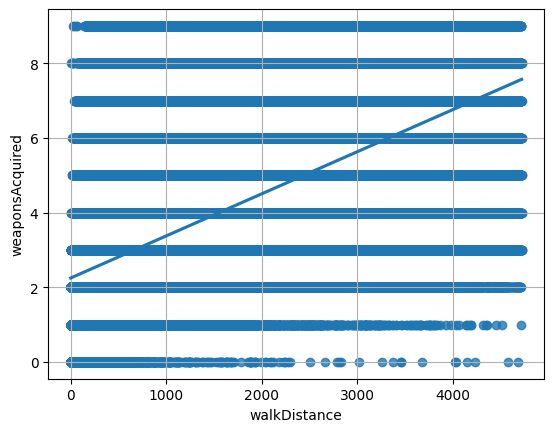

In [18]:
sns.regplot(x = 'walkDistance', y = 'weaponsAcquired', data = data2_Game)
plt.grid()
plt.show()

In [19]:
data2_Game.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchType          0
maxPlace           1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

In [20]:
data2_Game.dropna()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861237,0,0,100.00,1,0,1,52,1318,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,667.70,4.0,1462.0,0.4828
861238,0,0,207.00,2,1,0,12,0,2,1,...,0.0,280.5000,0.0,0.00,0.0,0.0,1467.00,3.0,0.0,0.7037
861239,0,0,78.94,0,0,0,34,1204,1,1,...,0.0,0.0000,0.0,0.00,0.0,0.0,523.70,5.0,1444.0,0.3535
861240,0,1,113.20,0,0,1,54,1243,0,0,...,0.0,0.0000,0.0,0.00,0.0,0.0,1124.00,3.0,1501.0,0.6170


* matchType 별로 데이터를 나눈다 (Solo, Duo, Squad)

In [21]:
data2_Game['matchType'].value_counts()

squad-fpp           332772
duo-fpp             188383
squad               118909
solo-fpp            100556
duo                  58916
solo                 33150
normal-squad-fpp      2180
crashfpp              1173
normal-duo-fpp         894
flaretpp               427
normal-solo-fpp        140
flarefpp               134
crashtpp                75
normal-squad            50
normal-duo              25
normal-solo             23
solo-                    1
Name: matchType, dtype: int64

In [22]:
data2_Solo = data2_Game.copy()
data2_Duo = data2_Game.copy()
data2_Squad = data2_Game.copy()

In [23]:
df_Solo = data2_Solo[data2_Solo['matchType'] == 'solo-fpp']
df_Duo = data2_Solo[data2_Solo['matchType'] == 'duo-fpp']
df_Squad = data2_Solo[data2_Solo['matchType'] == 'squad-fpp']

In [24]:
#matchType 칼럼에서 solo-fpp만 추출
df_Solo['matchType'].value_counts()

solo-fpp    100556
Name: matchType, dtype: int64

In [25]:
#solo-fpp 데이터를 추출했기때문에 matchType 을 삭제
df_Solo.drop(['matchType'], axis = 1, inplace = True)

<ipython-input-25-45ddcdd8dac4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Solo.drop(['matchType'], axis = 1, inplace = True)


In [26]:
df_Solo

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,0,0,100.000,0,0,0,45,0,1,1,...,0.0,0.0,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875
7,0,0,8.538,0,0,0,48,1000,0,0,...,0.0,2004.0,0.0,0.00,0.0,0.0,1089.00,6.0,1500.0,0.7368
13,0,1,324.200,0,1,5,5,986,4,1,...,0.0,1228.0,0.0,76.84,0.0,0.0,2050.00,6.0,1462.0,0.8750
17,0,3,254.300,0,0,12,13,0,2,1,...,0.0,2367.0,0.0,15.29,0.0,0.0,1787.00,3.0,0.0,0.8211
35,0,0,136.900,0,0,0,37,0,1,1,...,0.0,0.0,0.0,0.00,0.0,0.0,270.70,1.0,0.0,0.3474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861210,0,0,34.980,0,0,0,89,1474,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,11.58,1.0,1521.0,0.1020
861214,0,3,295.300,0,2,2,17,0,2,1,...,0.0,2517.0,0.0,0.00,0.0,0.0,3130.00,5.0,0.0,0.8043
861216,0,0,200.000,0,2,0,21,1265,2,2,...,0.0,0.0,0.0,0.00,0.0,0.0,87.05,3.0,1480.0,0.2551
861226,0,0,0.000,0,0,0,59,0,0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,208.20,3.0,0.0,0.5158


*  Solo 데이터에 필요없는 칼럼 제거()

In [27]:
df_Solo.drop(['DBNOs', 'revives', 'teamKills'], axis = 1, inplace = True)

<ipython-input-27-bb6a873d9d92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Solo.drop(['DBNOs', 'revives', 'teamKills'], axis = 1, inplace = True)


In [28]:
df_Solo

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,0,0,100.000,0,0,45,0,1,1,58.53,97.0,1560.0,0.0,0.0,0.00,0.0,49.75,2.0,0.0,0.1875
7,0,0,8.538,0,0,48,1000,0,0,0.00,96.0,-1.0,2004.0,0.0,0.00,0.0,1089.00,6.0,1500.0,0.7368
13,0,1,324.200,1,5,5,986,4,1,49.83,97.0,-1.0,1228.0,0.0,76.84,0.0,2050.00,6.0,1462.0,0.8750
17,0,3,254.300,0,12,13,0,2,1,36.00,96.0,1536.0,2367.0,0.0,15.29,0.0,1787.00,3.0,0.0,0.8211
35,0,0,136.900,0,0,37,0,1,1,22.83,96.0,1500.0,0.0,0.0,0.00,0.0,270.70,1.0,0.0,0.3474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861210,0,0,34.980,0,0,89,1474,0,0,0.00,99.0,-1.0,0.0,0.0,0.00,0.0,11.58,1.0,1521.0,0.1020
861214,0,3,295.300,2,2,17,0,2,1,53.03,93.0,1518.0,2517.0,0.0,0.00,0.0,3130.00,5.0,0.0,0.8043
861216,0,0,200.000,2,0,21,1265,2,2,12.46,99.0,-1.0,0.0,0.0,0.00,0.0,87.05,3.0,1480.0,0.2551
861226,0,0,0.000,0,0,59,0,0,0,0.00,96.0,1518.0,0.0,0.0,0.00,0.0,208.20,3.0,0.0,0.5158


In [31]:
#히트맵을 그려 상관관계를 본다
df_corr=df_Solo.corr()

<Axes: >

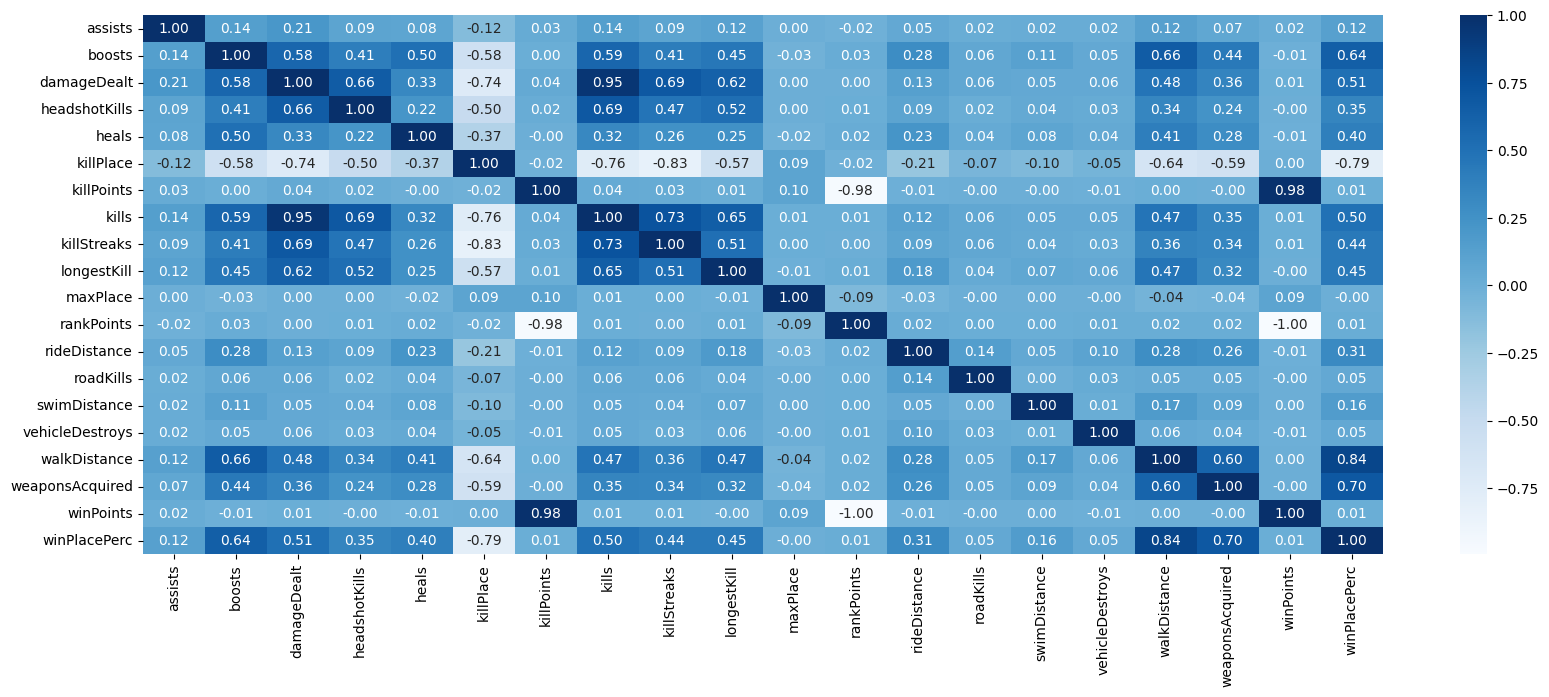

In [32]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

* 데이터 시각화

In [33]:
df_Solo['winPlacePerc'].describe()

count    100556.000000
mean          0.491110
std           0.291962
min           0.000000
25%           0.239100
50%           0.484500
75%           0.742300
max           1.000000
Name: winPlacePerc, dtype: float64

In [34]:
win_group = pd.cut(df_Solo['winPlacePerc'],10)
win_group.value_counts()

(-0.001, 0.1]    11038
(0.4, 0.5]       10302
(0.3, 0.4]       10232
(0.1, 0.2]       10225
(0.2, 0.3]       10149
(0.9, 1.0]       10046
(0.7, 0.8]        9778
(0.5, 0.6]        9775
(0.6, 0.7]        9544
(0.8, 0.9]        9467
Name: winPlacePerc, dtype: int64

In [35]:
bins = np.arange(0.1, 1.1 ,0.1)
bins

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [36]:
bins_label = [str(x*100)+"이상" for x in bins]

In [37]:
df_Solo["win_diff"] = pd.cut(df_Solo["winPlacePerc"], bins, right=False, labels=bins_label[:-1])

<ipython-input-37-bdcbc842ee3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Solo["win_diff"] = pd.cut(df_Solo["winPlacePerc"], bins, right=False, labels=bins_label[:-1])


In [38]:
df_Solo

,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,win_diff
4,0,0,100.000,0,0,45,0,1,1,58.53,...,1560.0,0.0,0.0,0.00,0.0,49.75,2.0,0.0,0.1875,10.0이상
7,0,0,8.538,0,0,48,1000,0,0,0.00,...,-1.0,2004.0,0.0,0.00,0.0,1089.00,6.0,1500.0,0.7368,70.0이상
13,0,1,324.200,1,5,5,986,4,1,49.83,...,-1.0,1228.0,0.0,76.84,0.0,2050.00,6.0,1462.0,0.8750,80.0이상
17,0,3,254.300,0,12,13,0,2,1,36.00,...,1536.0,2367.0,0.0,15.29,0.0,1787.00,3.0,0.0,0.8211,80.0이상
35,0,0,136.900,0,0,37,0,1,1,22.83,...,1500.0,0.0,0.0,0.00,0.0,270.70,1.0,0.0,0.3474,30.000000000000004이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861210,0,0,34.980,0,0,89,1474,0,0,0.00,...,-1.0,0.0,0.0,0.00,0.0,11.58,1.0,1521.0,0.1020,10.0이상
861214,0,3,295.300,2,2,17,0,2,1,53.03,...,1518.0,2517.0,0.0,0.00,0.0,3130.00,5.0,0.0,0.8043,80.0이상
861216,0,0,200.000,2,0,21,1265,2,2,12.46,...,-1.0,0.0,0.0,0.00,0.0,87.05,3.0,1480.0,0.2551,20.0이상
861226,0,0,0.000,0,0,59,0,0,0,0.00,...,1518.0,0.0,0.0,0.00,0.0,208.20,3.0,0.0,0.5158,50.0이상


In [39]:
def Bar_p(var):
    sns.barplot(x="win_diff", y=var, data=df_Solo)
    plt.grid()
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


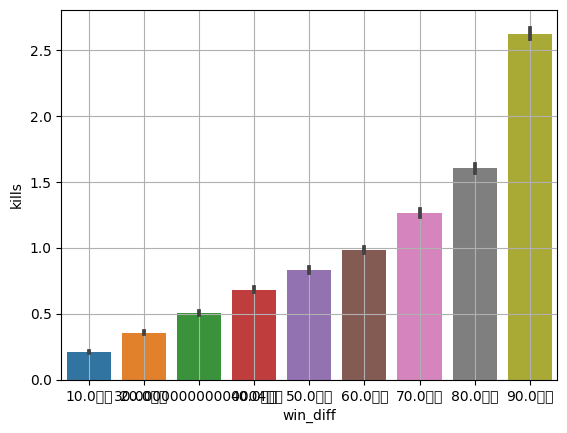

In [40]:
Bar_p('kills')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


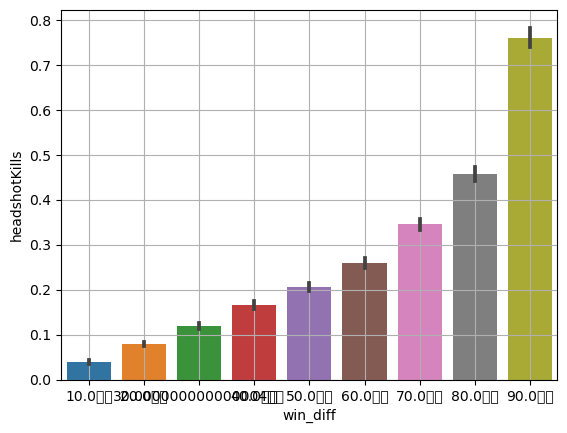

In [ ]:
Bar_p('headshotKills')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


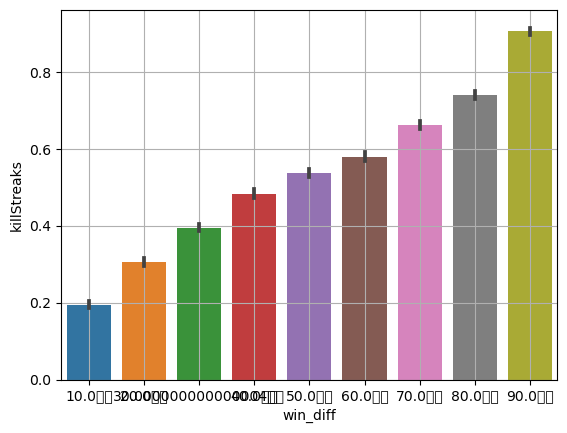

In [ ]:
Bar_p('killStreaks')

* 킬관련 에서는 많은 킬을 하는 사람이 1등을 할 가능성이 높다

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


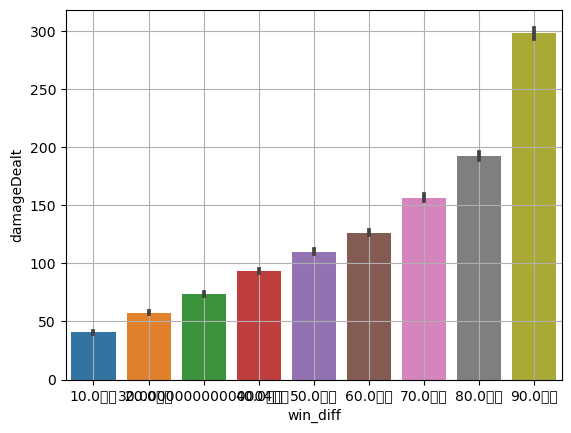

In [ ]:
Bar_p('damageDealt')